### Bit Bikes

 Bit Bikes wil in Juli 2023 zo veel mogelijk fietsen verkopen/verhuren. Wij hebben daarom de opdracht gekregen om Bit Bikes conrecte adviesen te geven op basis van de data van voorgaande jaren om dit doel te kunnen bereiken. Hieronder hebben wij meerdere analyses gedaan en deze gevisualiseert in grafieken. In deze analyses leggen wij uit wat er te zien is in de grafieken en hoe deze informatie nuttig is voor de verkoop/verhuur voor het aankomende jaar.

Hier importeren wij de benodigde software voor onze grafieken, en importeren wij de data. Deze data slaan we op in variabelen per jaar.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import date, timedelta

data2020 = pd.read_csv('202007-divvy-tripdata.csv')
data2021 = pd.read_csv('202107-divvy-tripdata.csv')
data2022 = pd.read_csv('202207-divvy-tripdata.csv')
data2020


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,762198876D69004D,docked_bike,09/07/2020 15:22,09/07/2020 15:25,Ritchie Ct & Banks St,180.0,Wells St & Evergreen Ave,291.0,41.906866,-87.626217,41.906724,-87.634830,member
1,BEC9C9FBA0D4CF1B,docked_bike,24/07/2020 23:56,25/07/2020 00:20,Halsted St & Roscoe St,299.0,Broadway & Ridge Ave,461.0,41.943670,-87.648950,41.984045,-87.660274,member
2,D2FD8EA432C77EC1,docked_bike,08/07/2020 19:49,08/07/2020 19:56,Lake Shore Dr & Diversey Pkwy,329.0,Clark St & Wellington Ave,156.0,41.932588,-87.636427,41.936497,-87.647539,casual
3,54AE594E20B35881,docked_bike,17/07/2020 19:06,17/07/2020 19:27,LaSalle St & Illinois St,181.0,Clark St & Armitage Ave,94.0,41.890762,-87.631697,41.918306,-87.636282,casual
4,54025FDC7440B56F,docked_bike,04/07/2020 10:39,04/07/2020 10:45,Lake Shore Dr & North Blvd,268.0,Clark St & Schiller St,301.0,41.911722,-87.626804,41.907993,-87.631501,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
551475,C6DF8D53DF18817E,docked_bike,12/07/2020 13:07,12/07/2020 13:24,Broadway & Barry Ave,300.0,Lake Shore Dr & North Blvd,268.0,41.937582,-87.644097,41.911722,-87.626804,casual
551476,972AFD72E2CAFAC6,docked_bike,08/07/2020 22:20,08/07/2020 23:44,Michigan Ave & Jackson Blvd,284.0,Michigan Ave & Jackson Blvd,284.0,41.877850,-87.624080,41.877850,-87.624080,casual
551477,D78F2AD0592D884F,docked_bike,18/07/2020 21:52,18/07/2020 22:09,Lincoln Ave & Belle Plaine Ave,298.0,Halsted St & Wrightwood Ave,349.0,41.956003,-87.680161,41.929143,-87.649077,casual
551478,7CE0C2DB6D70727D,docked_bike,20/07/2020 17:32,20/07/2020 18:00,Evanston Civic Center,661.0,Evanston Civic Center,661.0,42.057044,-87.686554,42.057044,-87.686554,casual


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

We filteren de data zodat alleen de data overblijft die we nodig hebben.

In [2]:
# Ik verwijder de onnodige data uit de dataframes.
data2020_filtered= data2020[['ride_id', 'rideable_type', 'started_at', 'ended_at',
                            'start_station_name', 'start_station_id', 'end_station_name','end_station_id','member_casual']]


data2021_filtered= data2021[['ride_id', 'rideable_type', 'started_at', 'ended_at',
                            'start_station_name', 'start_station_id', 'end_station_name','end_station_id','member_casual']]


data2022_filtered= data2022[['ride_id', 'rideable_type', 'started_at', 'ended_at',
                            'start_station_name', 'start_station_id', 'end_station_name','end_station_id','member_casual']]

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Als eerst brengen we in kaart hoeveel fietsen er per jaar worden verhuurd.
Hierbij voegen wij alle data van de drie voorgaande jaren bij elkaar toe, om zo een overzichterlijke grafiek te kunnen maken.

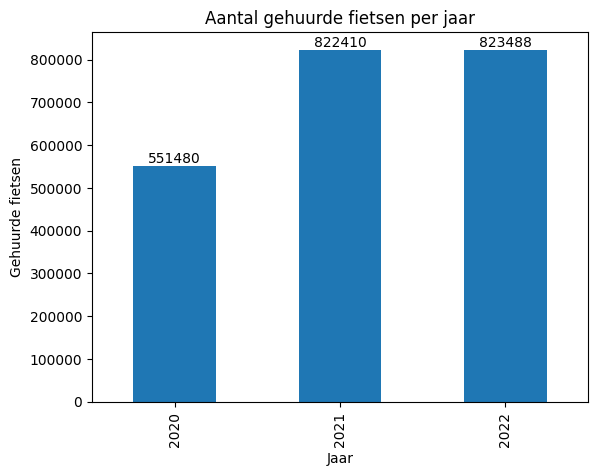

In [3]:
# Ik sla de 'started_at' en de 'ride_id' kolommen op in een variabel, dit voor elk jaar.
df1 = pd.DataFrame(data2020[['started_at', 'ride_id', 'rideable_type']])
df2 = pd.DataFrame(data2021[['started_at', 'ride_id', 'rideable_type']])
df3 = pd.DataFrame(data2022[['started_at', 'ride_id', 'rideable_type']])

# Ik sla de variabelen van de dataframes op in 1 variabel. Zodat ik alles bij elkaar heb.
frames = [df1, df2, df3]
result = pd.concat(frames)

# Ik zorg dat de date enkel op basis van jaar word weergeven.
result['started_day'] = pd.to_datetime(result['started_at'], dayfirst=True).dt.year

#Ik plot de data
ax = result.groupby('started_day')['ride_id'].count().plot.bar()
ax.set_xlabel("Jaar")
ax.set_ylabel("Gehuurde fietsen")
ax.set_title('Aantal gehuurde fietsen per jaar')
ax.bar_label(ax.containers[0])
plt.show()


Uit de grafiek hebben wij kunnen concluderen dat de vraag naar fietsen per jaar steeds groeit. Ook zien we een enorme groei van het jaar 2020 tot 2021. Dit kan te maken hebben met het aantal fietsen wat BitBikes dat jaar tot zijn beschikking had. 


We willen de data nog beter in zien. Daarom hebben wij gekozen om het aantal gehuurde fietsen te showen maar dan per type fiets

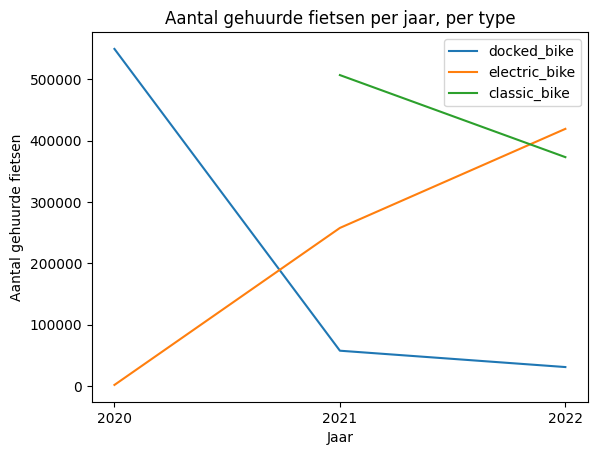

In [4]:
typeAndYear = result.groupby(['started_day', 'rideable_type'])['ride_id'].count()
typeAndYear

indexReset = typeAndYear.reset_index(level=[1])
indexReset
fig, ax = plt.subplots()
docked = indexReset[indexReset['rideable_type'] == 'docked_bike']
ax.plot(docked.index, docked['ride_id'])
electric = indexReset[indexReset['rideable_type'] == 'electric_bike']
ax.plot(electric.index, electric['ride_id'])
classic = indexReset[indexReset['rideable_type'] == 'classic_bike']
ax.plot(classic.index, classic['ride_id'])
plt.xticks([2020, 2021, 2022])
ax.set_xlabel("Jaar")
ax.set_ylabel("Aantal gehuurde fietsen")
ax.set_title('Aantal gehuurde fietsen per jaar, per type')
ax.legend(indexReset['rideable_type'])
plt.show()

Hier laten we per fietstype zien, hoeveel er verhuurd zijn de afgelopen jaren. Hier zien we duidelijk de afname van het aantal docked bikes, en de enorme toename van de verhuurd van eletrische fietsen. Wij verwachten daarom ook dat deze stijgende lijn in elektrische fietsen zich door zal trekken gedurende 2023. Na een stijging van zo'n 250.000 fietsen van 2021 naar 2022. Verwachten wij dat er in 2023 zeker gerekend moet worden op een soort gelijke stijging. Dit in combinatie met de afnames van zowel de docked bikes als de classic bikes geeft aan dat er vors ingezet moet worden op het aantal elektrische fietsen.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

Vervolgends gaan we hier wat specifieker naar kijken. In de volgende drie plots laten we het totaal aantal verhuurde fietsen per weekdag zien. Dit op basis van jaar.
Hier maken we een nieuwe kolom aan in de drie databases, om zo het aantal verhuurde fietsen per weekdag te kunnen visualiseren.

In [5]:
# We maken een nieuwe kolom aan in de dataframe waar we de start maand per fiets in opslaan.
data2020_filtered_copy = data2020_filtered.copy()
data2020_filtered_copy.loc[:, 'start_day'] = pd.to_datetime(data2020_filtered_copy['started_at'], dayfirst=True).dt.weekday
data2021_filtered_copy = data2020_filtered.copy()
data2021_filtered_copy.loc[:, 'start_day'] = pd.to_datetime(data2021_filtered_copy['started_at'], dayfirst=True).dt.weekday
data2022_filtered_copy = data2022_filtered.copy()
data2022_filtered_copy.loc[:, 'start_day'] = pd.to_datetime(data2022_filtered_copy['started_at'], dayfirst=True).dt.weekday

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Hier plotten we het aantal verhuurde fietsen per weekdag voor het jaar 2020

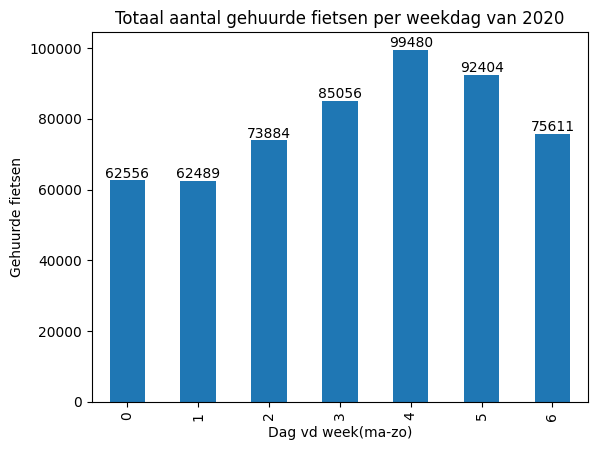

In [6]:
# Hier plotten we het aantal verhuurde fietsen per weekdag voor het jaar 2020
ax = data2020_filtered_copy.groupby('start_day')['ride_id'].count().plot.bar()
ax.set_xlabel("Dag vd week(ma-zo)")
ax.set_ylabel("Gehuurde fietsen")
ax.set_title('Totaal aantal gehuurde fietsen per weekdag van 2020')
ax.bar_label(ax.containers[0])
plt.show()

Uit deze grafiek kunnen wij concluderen dat er op vrijdag de meeste fietsen gehuurd/verkocht worden. Ook donderdag en zaterdag worden er duideluik meer fietsten verkocht/verhuurd dan de andere weekdagen in juli 2020. Wat opvalt uit de grafiek is dat er geen duidelijke stijging is in het aantal verhuurde/verkochte fietsen op de zondag.

#### Hier plotten we het aantal verhuurde fietsen per weekdag voor het jaar 2021

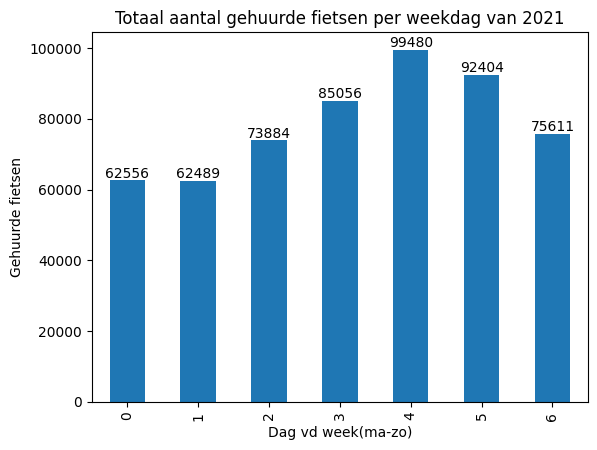

In [7]:
# Hier plotten we dezelfde data voor het jaar 2021
ax = data2021_filtered_copy.groupby('start_day')['ride_id'].count().plot.bar()
ax.set_xlabel("Dag vd week(ma-zo)")
ax.set_ylabel("Gehuurde fietsen")
ax.set_title('Totaal aantal gehuurde fietsen per weekdag van 2021')
ax.bar_label(ax.containers[0])
plt.show()

Uit deze grafiek kunnen wij concluderen dat er op zaterdag de meeste fietsen gehuurd/verkocht worden. Ook donderdag en vrijdag worden er duideluik meer fietsten verkocht/verhuurd dan de andere weekdagen in juli 2021. Wat opvalt uit de grafiek is dat er net als het jaar ervoor geen duidelijke stijging is in het aantal verhuurde/verkochte fietsen op de zondag.

#### Hier plotten we het aantal verhuurde fietsen per weekdag voor het jaar 2022

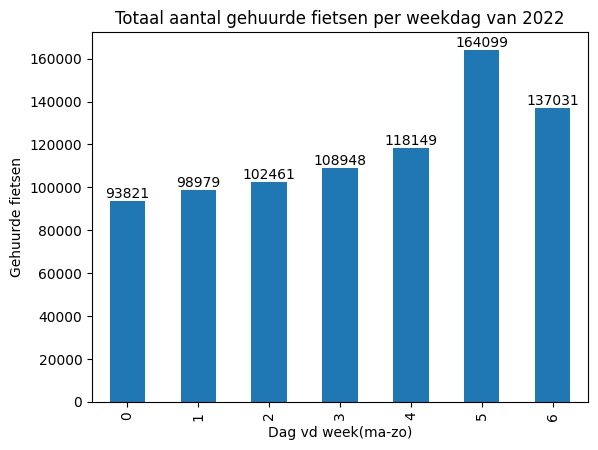

In [8]:
# Hier plotten we dezelfde data voor het jaar 2022
ax = data2022_filtered_copy.groupby('start_day')['ride_id'].count().plot.bar()
ax.set_xlabel("Dag vd week(ma-zo)")
ax.set_ylabel("Gehuurde fietsen")
ax.set_title('Totaal aantal gehuurde fietsen per weekdag van 2022')
ax.bar_label(ax.containers[0])
plt.show()

Uit deze grafiek kunnen wij concluderen dat er op zaterdag de meeste fietsen gehuurd/verkocht worden. Ook zondag word er duideluik meer fietsten verkocht/verhuurd dan de andere weekdagen in juli 2022. Wat opvalt uit de grafiek is dat er in vergelijking met voorgaande jaren een duidelijke groei is in het aantal verhuurde/verkochte fietsen op de zondag. Waar voorgaande jaren er niet boven gemiddeld verhuurd/verkocht werd, is dat dit jaar duidelijk wel het geval vergeleken de anderde weekdagen.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Hier maken we 3 pie charts die het verschil in leden en non-leden weergeeft per jaar

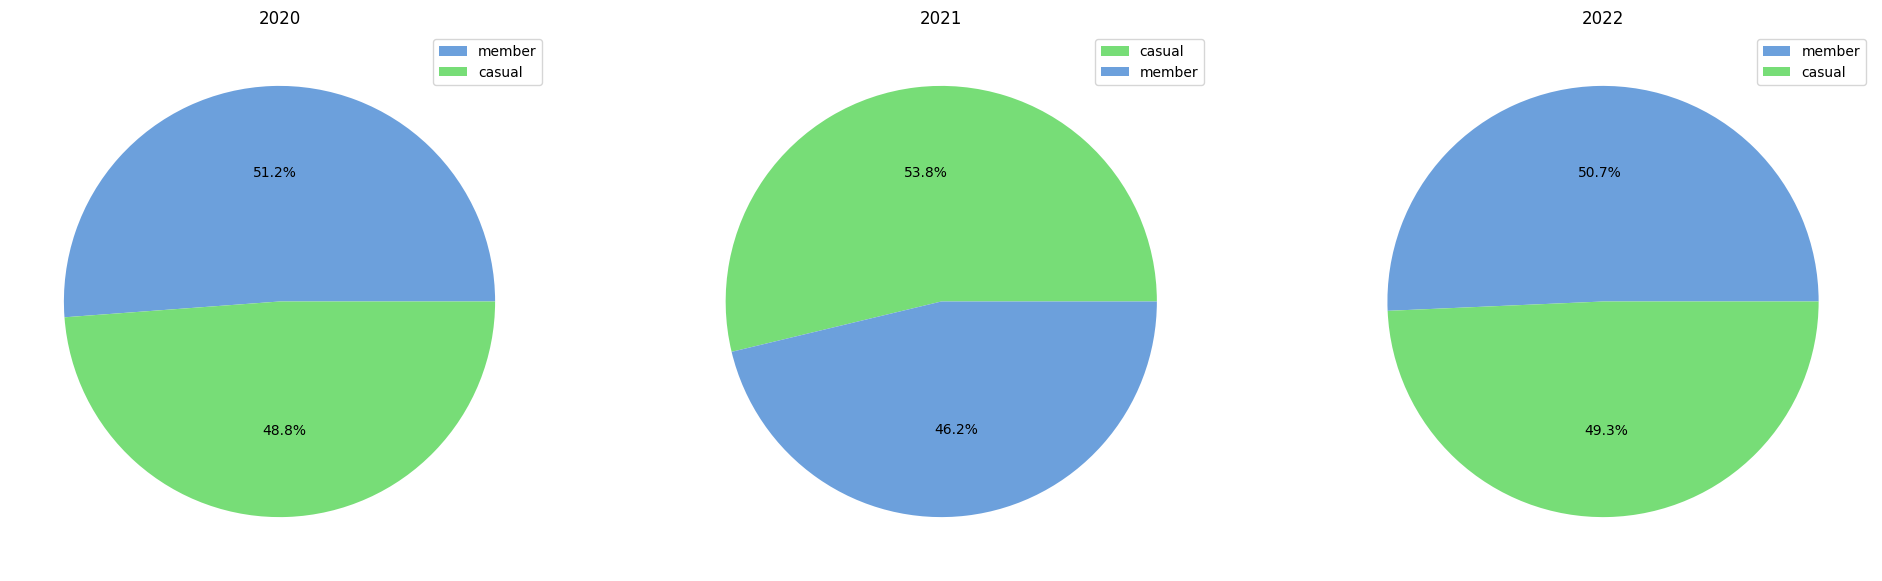

In [9]:
# We tellen hoeveel waardes van elk type fiets er zijn, dit slaan we op in variablen
member2020= data2020.value_counts('member_casual')
membername2020= data2020["member_casual"].drop_duplicates()
member2021= data2021.value_counts('member_casual')
membername2021= data2021["member_casual"].drop_duplicates()
member2022= data2022.value_counts('member_casual')
membername2022= data2022["member_casual"].drop_duplicates()

# We maken subplots aan, en geven hier de juiste waarde aan mee om een mooi en overzichtelijk beeld te krijgen
fig, ax = plt.subplots(nrows= 1, ncols=3, figsize=(10,7))
plt.subplots_adjust(right=2)

colors = ['#6CA0DC', '#77DD77']
colors2 = ['#77DD77','#6CA0DC']

#plot 1
ax[0].pie(member2020,colors= colors, autopct='%1.1f%%')
ax[0].set_title('2020')
ax[0].legend(member2020.index,loc='upper right')
#plot 2
ax[1].pie(member2021,colors= colors2, autopct='%1.1f%%')
ax[1].set_title('2021')
ax[1].legend(member2021.index,loc='upper right')
#plot 3
ax[2].pie(member2022,colors= colors, autopct='%1.1f%%')
ax[2].set_title('2022')
ax[2].legend(member2022.index, loc='upper right')

plt.show()

We zien in het jaar 2020 en 2021 een enorme daling in het aantal mensen met een abbonement bij Bit Bikes. Het jaar erop zien we weer een vorse stijging in het aantal huurders/kopers met een abbonement.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Hier maken we 3 pie charts die het verschil in fietstypes weergeeft per jaar

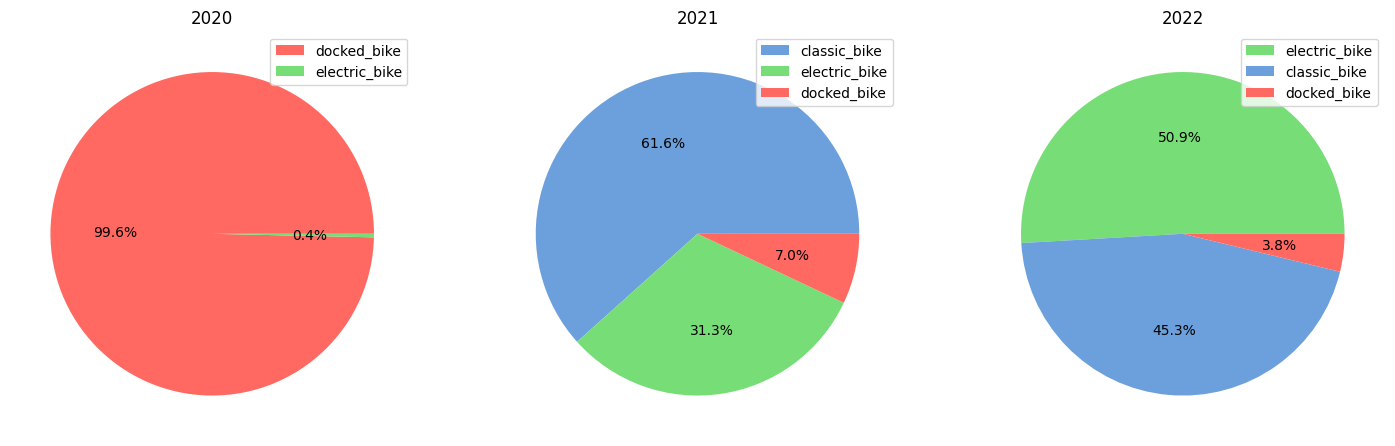

In [10]:
# We tellen hoeveel waardes van elk type fiets er zijn, dit slaan we op in variablen
types2020= data2020.value_counts('rideable_type')
typesname2020= data2020['rideable_type'].drop_duplicates()
types2021= data2021.value_counts('rideable_type')
typesname2021= data2021["rideable_type"].drop_duplicates()
types2022= data2022.value_counts('rideable_type')
typesname2022= data2022["rideable_type"].drop_duplicates()

# We maken een variabel die kleuren geeft aan de charts, om zo een duidelijker beeld te krijgen
colors3 = ['#6CA0DC', '#77DD77','#FF6961']
colors4 = ['#FF6961', '#77DD77']
colors5 = ['#77DD77','#6CA0DC','#FF6961']
# We maken subplots aan, en geven hier de juiste waarde aan mee om een mooi en overzichtelijk beeld te krijgen
fig, ax = plt.subplots(nrows= 1, ncols=3,  figsize=(10,7))
plt.subplots_adjust(right=1.5)

#plot 1
ax[0].pie(types2020, colors= colors4, autopct='%1.1f%%')
ax[0].set_title('2020')
ax[0].legend(types2020.index, loc='upper right')
#plot 2
ax[1].pie(types2021,colors= colors3, autopct='%1.1f%%')
ax[1].set_title('2021')
ax[1].legend(types2021.index, loc='upper right')
#plot 3
ax[2].pie(types2022,colors= colors5, autopct='%1.1f%%')
ax[2].set_title('2022')
ax[2].legend(types2022.index, loc='upper right')

plt.show()


In deze pie charts zien we het aantal verhuurde fietstypes per jaar. Het valt ons enorm op dat Bit Bikes in 2020 grotendeels bestond uit docked bikes. Maar dat dit in de jaren erna erg veranderd is. Het jaar erop worden er veel meer standaard fietsen en elektrische fietsen verhuurd. En het laatste jaar het aantal verhuurde elektrische fietsen de leiding genomen heeft. De docked bikes worden steeds minder verhuurd door dit nieuwe aanbod aan andere mogelijkheden.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Eind conclusie en adviezen

Bit bikes is de afgelopen jaren erg goed bezig geweest, en dat is te zien in hun groei. 

Als aller eerst hebben we bekeken wat de groei van het bedrijf was, op basis van verhuurde fietsen per jaar. Daaruit kunnen we concluderen dat de vraag steeds meer groeit naar huurbare fietsen. Daarom is ons eerste advies om meer fietsen aan te schaffen, om zo het aanbod voldoende te houden voor de vraag voor het komende jaar.

Uit onze laatste grafiek blijkt ook dat het type fietsen erg belangrijk is, en raden wij aan om voor komend jaar, het aantal docked bikes nog meer te verminderen en het aantal elektrische fietsen te vergroten. Er zit een duidelijke stijging in de vraag naar elektrische fietsen, en wij verwachten dat dit alleen maar meer zal worden voor het komende jaar.

Ook zien we in onze visualisaties dat het verschil in verhuurde fietsen erg groot is als je kijkt naar de weekdagen. Zo zien we dat het afgelopen jaar de meeste fietsen verhuurd worden in het weekend. En de rest van de week overduidelijk minder. Wij adviseren om te kijken naar de prijzen van de fietsen doordeweeks. Misschien dat een lagere prijs doordeweeks, meer mensen de drempel overhaald om ook dan een fiets te komen huren.

We hebben ook gekeken naar het abbonement systeem van Bit Bikes. We hebben per jaar bekeken hoeveel huurders een abbonement hebben en hoeveel niet. Hieruit zien we een schommelend verschil. In 2020 had het meerendeel van de huurders een abbonement, in 2021 is dit toen vors gedaalt, en waren en maar zo'n 46% van de huurders met een abbonement. Afgelopen jaar is dit wel weer omhoog gegaan naar een redelijk gelijke verdeling. 
Het doel is om zo veel mogelijk abbonees te hebben, zodat je een stabieler inkomen creeërd als bedrijf zijnde. Daarom raden wij aan om naar het abbonement pakket te kijken. Acties zoals: Vaker met aanbiedingen komen, een welkom cadeau bij je eerste maand leveren, meer adverteren, spaarkaarten of een mogelijke famillie bundel. Zijn allerlij manieren om meer mensen over te halen om toch voor een abbonement te kiezen. 